In [1]:
import pandas as pd

In [22]:
clientes = pd.read_csv('bank.csv', engine = 'python')

In [23]:
clientes.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [24]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [25]:
#Variables predictoras
x = clientes.iloc[:,11:15]

# Variable a predecir
y = clientes.iloc[:,16]

x.head()

,duration,campaign,pdays,previous
0,79,1,-1,0
1,220,1,339,4
2,185,1,330,1
3,199,4,-1,0
4,226,1,-1,0


In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=0)

In [27]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 4384 to 2732
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   duration  3390 non-null   int64
 1   campaign  3390 non-null   int64
 2   pdays     3390 non-null   int64
 3   previous  3390 non-null   int64
dtypes: int64(4)
memory usage: 132.4 KB


In [34]:
from sklearn.tree import DecisionTreeClassifier

arbol = DecisionTreeClassifier(max_depth=5)
# arbol = DecisionTreeClassifier()

arbol_suscrito = arbol.fit(x_train, y_train)

[Text(0.5255102040816326, 0.9166666666666666, 'duration <= 631.5\ngini = 0.2\nsamples = 3390\nvalue = [3007, 383]\nclass = no'),
 Text(0.27040816326530615, 0.75, 'duration <= 211.5\ngini = 0.148\nsamples = 3120\nvalue = [2869, 251]\nclass = no'),
 Text(0.11224489795918367, 0.5833333333333334, 'previous <= 0.5\ngini = 0.055\nsamples = 1913\nvalue = [1859, 54]\nclass = no'),
 Text(0.04081632653061224, 0.4166666666666667, 'duration <= 77.5\ngini = 0.037\nsamples = 1591\nvalue = [1561, 30]\nclass = no'),
 Text(0.02040816326530612, 0.25, 'gini = 0.0\nsamples = 453\nvalue = [453, 0]\nclass = no'),
 Text(0.061224489795918366, 0.25, 'campaign <= 1.5\ngini = 0.051\nsamples = 1138\nvalue = [1108, 30]\nclass = no'),
 Text(0.04081632653061224, 0.08333333333333333, 'gini = 0.08\nsamples = 405\nvalue = [388, 17]\nclass = no'),
 Text(0.08163265306122448, 0.08333333333333333, 'gini = 0.035\nsamples = 733\nvalue = [720, 13]\nclass = no'),
 Text(0.1836734693877551, 0.4166666666666667, 'pdays <= 102.5\ng

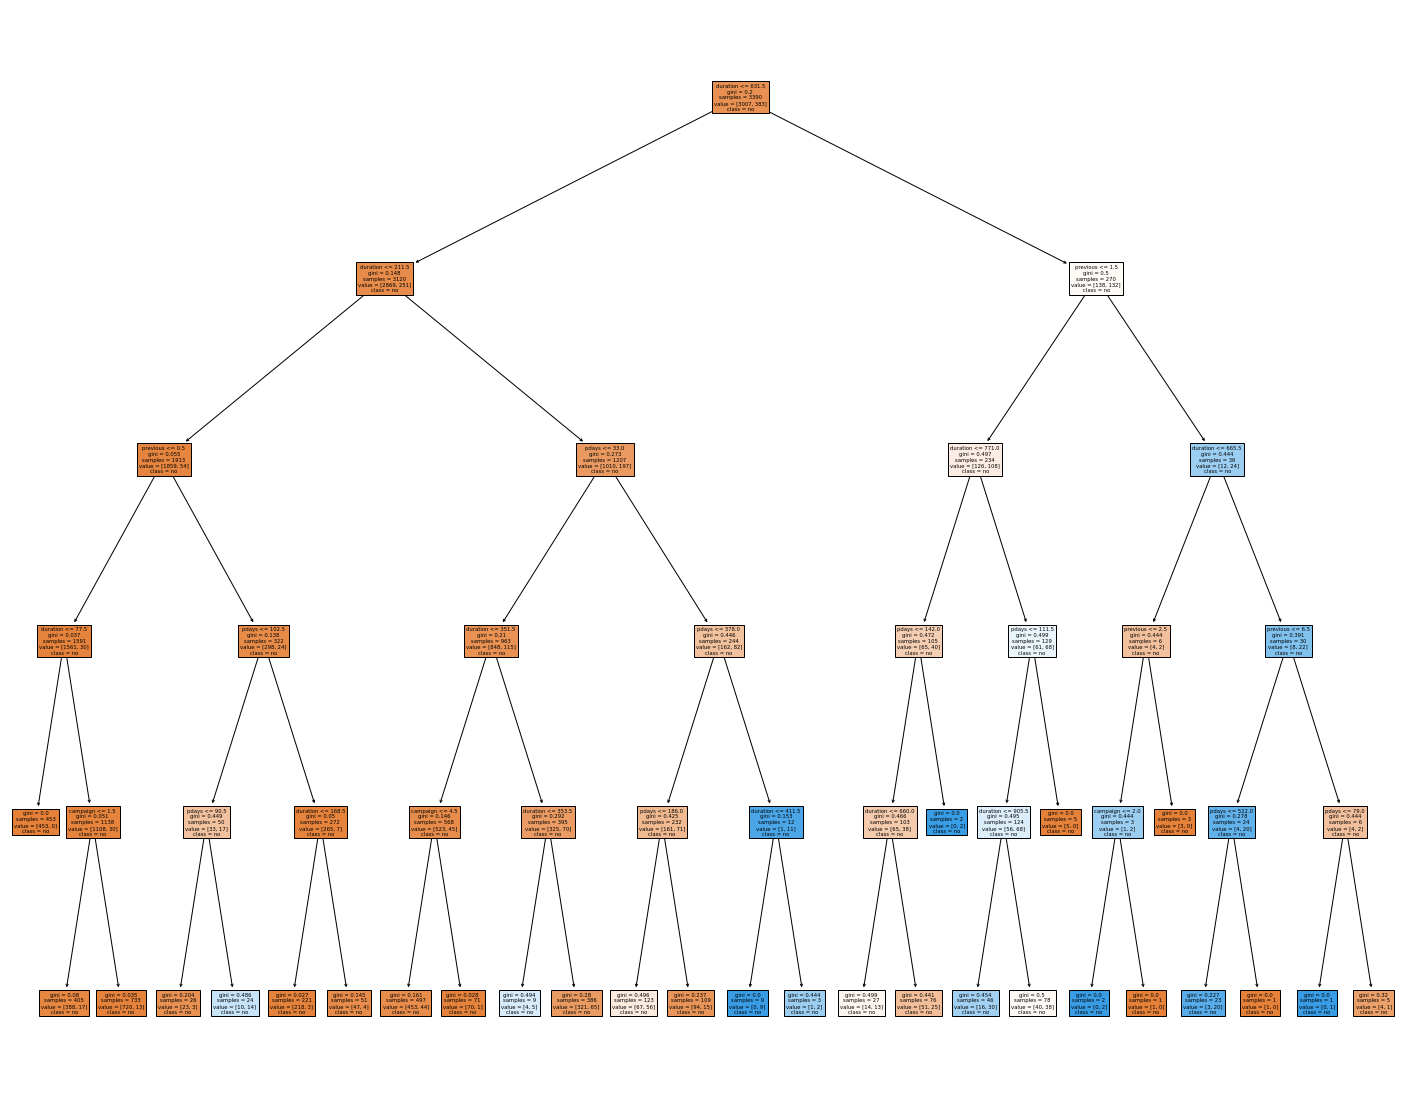

In [35]:
from matplotlib import pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(25,20))

tree.plot_tree(arbol_suscrito, feature_names=list(x.columns.values),class_names=list(y.values),filled=True)

# plt.show()

In [36]:
fig.savefig("Arbol de decision.png")

In [33]:
y_pred = arbol_suscrito.predict(x_test)

y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)